# Project: traffic signs classification

## Step 1: Import packages 

In [138]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
import cv2
from sklearn.metrics import classification_report
import seaborn as sn

## Step 2: Explore the data size distribution in classes

In [6]:
# Create a list that has lists of file names in each class as its elements
list_of_classes = []
for number in range(43):
    a = []
    for image_name in os.listdir('C:\\Users\\smart\\Desktop\\GitHub\\Traffic_Signs_Original\\Train\\{}'.format(str(number))):
        a.append(image_name)
    list_of_classes.append(a)
series_of_classes = pd.Series(list_of_classes)  

In [8]:
# Store the class names in x
x = list(series_of_classes.index)

# Store the number of files/images in each class in y
y = []
for i in x:
    y.append(len(list_of_classes[i])) 
    
print('x:',x)
print('y:',y)

x: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]
y: [210, 2220, 2250, 1410, 1980, 1860, 420, 1440, 1410, 1470, 2010, 1320, 2100, 2160, 780, 630, 420, 1110, 1200, 210, 360, 330, 390, 510, 270, 1500, 600, 240, 540, 270, 450, 780, 240, 689, 420, 1200, 390, 210, 2070, 300, 360, 240, 240]


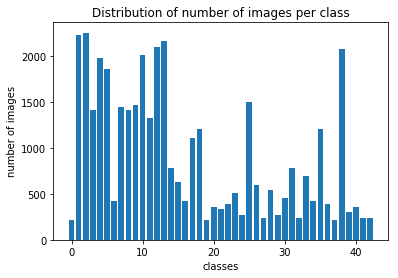

In [9]:
# plot 
plt.bar(x,y)
plt.title('Distribution of number of images per class')
plt.xlabel('classes')
plt.ylabel('number of images')
plt.show()

In [10]:
# import the csv file with the meaning of the signs/classes
signs_meanings = pd.read_csv(r'C:\Users\smart\Desktop\GitHub\Traffic_Signs\signs_meanings.csv')
signs_meanings

,sign_number,sign_meaning
0,0,Max Speed 20 km/h
1,1,Max Speed 30 km/h
2,2,Max Speed 50 km/h
3,3,Max Speed 60 km/h
4,4,Max Speed 70 km/h
5,5,Max Speed 80 km/h
6,6,End of Max Speed 80 km/h
7,7,Max Speed 100 km/h
8,8,Max Speed 120 km/h
9,9,No Passing (for any vehicle type)


## Step 3: Read, resize, and normalize the images

In [11]:
# Define a function to read, resize and label the images 


def process_resize_image(path_to_folder):
    '''
    retruns two arrays:
    X is an array of images
    Y is an array of labels
    path formate: 'C:\\Users\\smart\\Desktop\\GitHub\\Traffic_Signs\\Train'

    '''
    X = [] #images
    Y = [] #labels
    label = 0 
    
    for number in range(43):
        path_to_files = path_to_folder+'\\{}'.format(str(number))
        for image_name in os.listdir(path_to_files):
            X.append(cv2.resize(cv2.imread(os.path.join(path_to_files,image_name),cv2.IMREAD_GRAYSCALE),(28,28), interpolation = cv2.INTER_AREA))
            Y.append(label)
        label += 1
            
    return (X,Y)



In [13]:
resized_images, labels = process_resize_image('C:\\Users\\smart\\Desktop\\GitHub\\Traffic_Signs_Original\\Train')

In [14]:
# Split the data into train and test subsets

X_train, X_test, y_train, y_test = train_test_split (resized_images, labels, test_size = 0.25, random_state = 42)

In [15]:
# Check the lenth of the train and test subsets

ltr = len(y_train)
print("ltr: ",ltr)
lt = len(y_test)
print("lt: ",lt)

ltr:  29406
lt:  9803


In [16]:
# Double-check the unique values of labels for the train and test subsets

uniq_test_labels = np.unique(y_test)
print("test labels: ",uniq_test_labels)
uniq_training_labels = np.unique(y_train)
print("training labels:", uniq_training_labels)

test labels:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]
training labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]


In [17]:
# Convert the subsets to numpy arrays

X_train = np.array(X_train)
print('training images np array shape:',X_train.shape)

y_train = np.array(y_train)
y_train.shape = (ltr,1)
print('training labels np array shape:',y_train.shape)

X_test = np.array(X_test)
print('testing images np array shape:',X_test.shape)

y_test = np.array(y_test)
y_test.shape = (lt,1)
print('testing labels np array shape:',y_test.shape)

training images np array shape: (29406, 28, 28)
training labels np array shape: (29406, 1)
testing images np array shape: (9803, 28, 28)
testing labels np array shape: (9803, 1)


In [21]:
# Normalize the train and test image subsets

min_train = np.min(X_train)
print("min pixel value, train: ",min_train)
max_train = np.max(X_train)
print("max pixel value, train: ",max_train)
min_test = np.min(X_test)
print("min pixel value, test: ",min_test)
max_test = np.max(X_test)
print("max pixel value, test: ",max_test)

X_train_normalized = (X_train - min_train)/(max_train - min_train)
X_test_normalized = (X_test - min_test)/(max_test - min_train)

min_train_n = np.min(X_train_normalized)
print("min pixel value, train_normalized: ",min_train_n)
max_train_n = np.max(X_train_normalized)
print("max pixel value, train_normalized: ",max_train_n)
min_test_n = np.min(X_test_normalized)
print("min pixel value, test_normalized: ",min_test_n)
max_test_n = np.max(X_test_normalized)
print("max pixel value, test_normalized: ",max_test_n)

min pixel value, train:  3
max pixel value, train:  255
min pixel value, test:  3
max pixel value, test:  255
min pixel value, train_normalized:  0.0
max pixel value, train_normalized:  1.0
min pixel value, test_normalized:  0.0
max pixel value, test_normalized:  1.0


[18]


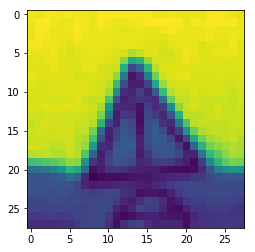

In [22]:
# Example image before nomalization 

plt.imshow(X_train[100])
print(y_train[100])

[18]


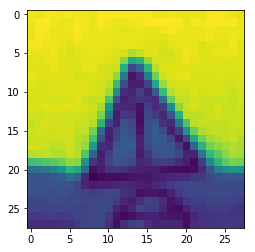

In [23]:
# Example image after nomalization 

plt.imshow(X_train_normalized[100])
print(y_train[100])

## Step 4: Define, Compile and Fit the Convolutional Neural Network Model

In [57]:
#CNN Model set to stop training after reaching 99% accuray 

class Mycallback2 (tf.keras.callbacks.Callback):
    def on_epoch_end (self,epoch, logs = {}):
        if logs.get("acc") > 0.99:
            print("\n accuracy is greater than 0.99 now \n")
            self.model.stop_training = True

training_images_c = X_train_normalized.reshape(29406,28,28,1)
test_images_c = X_test_normalized.reshape(9803,28,28,1)

callbacks = Mycallback2()
model_ts = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation = tf.nn.relu,input_shape = (28,28,1)),
                           tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                           tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                           tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(512, activation = tf.nn.relu),
                           tf.keras.layers.Dense(43, activation = 'softmax')])

model_ts.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.0001),loss = "sparse_categorical_crossentropy", metrics = ["acc"])
results = model_ts.fit(training_images_c, y_train, epochs = 15,callbacks = [callbacks])


Epoch 1/15
29406/29406 [==============================] - 131s 4ms/sample - loss: 1.0724 - acc: 0.7301
Epoch 2/15
29406/29406 [==============================] - 130s 4ms/sample - loss: 0.1947 - acc: 0.9495
Epoch 3/15
29406/29406 [==============================] - 128s 4ms/sample - loss: 0.0908 - acc: 0.9760
Epoch 4/15
29406/29406 [==============================] - 127s 4ms/sample - loss: 0.0478 - acc: 0.9873
Epoch 5/15
29376/29406 [============================>.] - ETA: 0s - loss: 0.0273 - acc: 0.9924
 accuracy is greater than 0.99 now 

29406/29406 [==============================] - 127s 4ms/sample - loss: 0.0273 - acc: 0.9924


In [25]:
print(results.history.keys())

dict_keys(['loss', 'acc'])


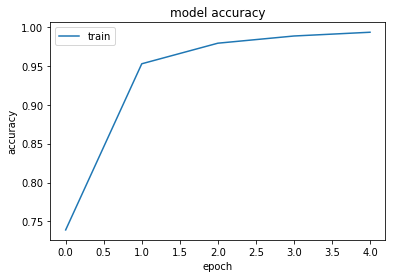

In [26]:
# summarize history for accuracy
plt.plot(results.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

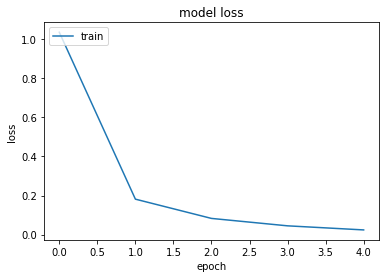

In [27]:
# summarize history for loss
plt.plot(results.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Step 5: Evaluate the model

In [59]:
model_ts.evaluate(test_images_c,y_test)

9803/9803 [==============================] - 8s 823us/sample - loss: 0.0791 - acc: 0.9826


[0.07905799278253012, 0.98255634]

In [60]:
prediction = model_ts.predict(test_images_c)

In [62]:
# Transform the test labels into a list of label values
labels_list = []
for i in range(len(y_test)):
    labels_list.append(int(y_test[i]))
    
print(labels_list[:10])

[26, 15, 13, 10, 15, 12, 25, 2, 11, 35]


In [63]:
# Transform the prediction into a list of label values
predictions_list = []
for i in range(len(prediction)):
    predictions_list.append(np.argmax(prediction[i]))
print(predictions_list[:10])

[26, 15, 13, 10, 15, 12, 25, 2, 11, 35]


In [66]:
# Print precision, recall, f1-score and support for all classes 
# support: the number of occurrences of each label (in y_test) 

evaluation_report = classification_report(labels_list,predictions_list)
print(evaluation_report)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        44
           1       0.99      0.96      0.98       594
           2       0.97      0.98      0.97       560
           3       0.99      0.93      0.96       348
           4       0.97      1.00      0.98       529
           5       0.93      0.97      0.95       462
           6       1.00      1.00      1.00        81
           7       0.96      0.97      0.97       336
           8       0.98      0.98      0.98       385
           9       0.98      0.99      0.98       359
          10       1.00      0.99      0.99       461
          11       0.99      0.99      0.99       291
          12       0.99      0.99      0.99       548
          13       0.99      1.00      1.00       549
          14       0.99      0.98      0.99       197
          15       1.00      0.99      1.00       152
          16       1.00      0.99      1.00       108
          17       0.99    

In [189]:
# Create a function to visualize the classification report

def plot_classification_report(cr):
    
    '''
    Visualizes the output of the classification_report
    cr: classification_report
    '''

    lines = evaluation_report.split('\n')
    #print('measures:',measures)
    classes = []
    plot_mat = []
    
    for line in lines[2 : (len(lines) - 5)]:
        t = line.split()
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t)-1]]
        plot_mat.append(v)            
        
    df_cm = pd.DataFrame(plot_mat, index = [i for i in classes],
                  columns = [i for i in ['precision', 'recall', 'f1-score']])
    plt.figure(figsize = (10,20))
    sn.heatmap(df_cm, annot=True)


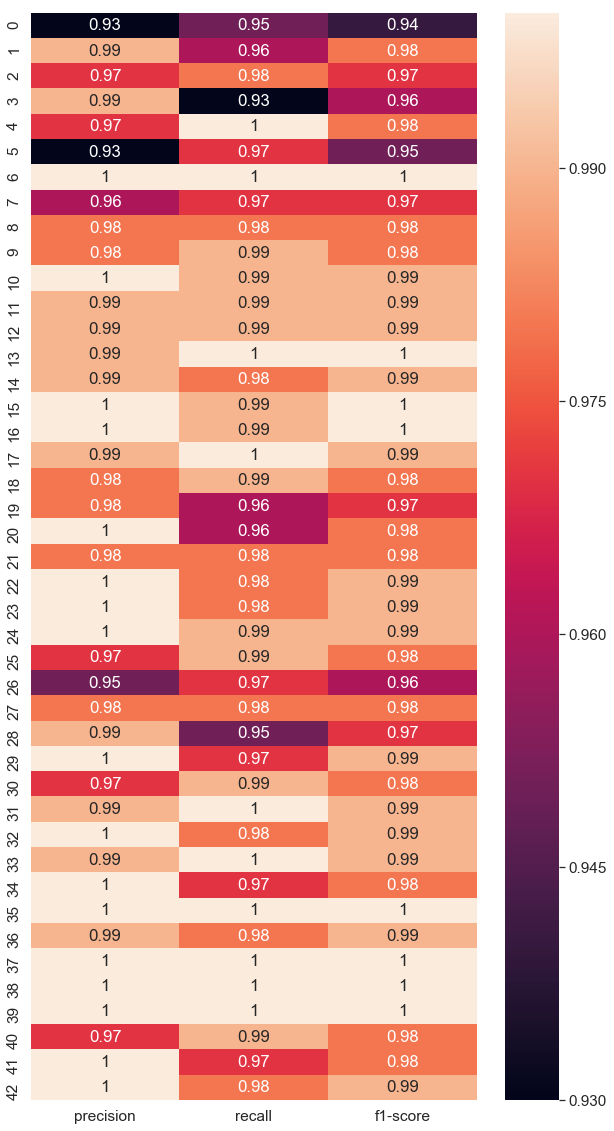

In [190]:
plot_classification_report(evaluation_report)

In [164]:
# Print some prediction vs true value comparisons 

for i in range(5):
    print("example",i)
    temporary_list = list(prediction[i])
    print('Predicted value:',temporary_list.index(max(temporary_list)))
    print('meaning:',signs_meanings['sign_meaning'][temporary_list.index(max(temporary_list))])
    print()
    print('Actual value:',y_test[i])
    print("_"*30)

example 0
Predicted value: 26
meaning: Traffic lights 

Actual value: [26]
______________________________
example 1
Predicted value: 15
meaning: No vehicles of any kind permitted

Actual value: [15]
______________________________
example 2
Predicted value: 13
meaning: Yield

Actual value: [13]
______________________________
example 3
Predicted value: 10
meaning: No Passing (by vehicles over 3,5 t)

Actual value: [10]
______________________________
example 4
Predicted value: 15
meaning: No vehicles of any kind permitted

Actual value: [15]
______________________________


## Step 6: Creat a function to read any new image and return its meaning 

In [29]:
# Define a function to read,resize,normalize and predict a new image 


def resize_normalize_predict (path_to_file):
    '''
    retruns one arrays:
    x is an array of images
    path formate: 'C:\\Users\\smart\\Desktop\\GitHub\\Traffic_Signs\\Train\\file_name.format'

    '''
    x = cv2.resize(cv2.imread(path_to_file,cv2.IMREAD_GRAYSCALE),(28,28), interpolation = cv2.INTER_AREA)
    x = np.array(x)
    ma = np.max(x) 
    mi = np.min(x)
    x_n = (x - mi)/(ma - mi)
    x_reshape = x_n.reshape(1,28,28,1)
    prediction_array = model_ts.predict(x_reshape)
    prediction_list = prediction_array.tolist()
    predicted_label = prediction_list[0].index(max(prediction_list[0]))
    meaning = signs_meanings['sign_meaning'][predicted_label]
    return (meaning)

In [30]:
#C:\Users\smart\Desktop\GitHub\Traffic_Signs_Original\Test

resize_normalize_predict("C:\\Users\\smart\\Desktop\\GitHub\\Traffic_Signs_Original\\Test\\00086.png")

'Max Speed 60 km/h'